# Negation signal - with bag of words
## Loading dataset

In [1]:
from negation_signal_common import create_semi_dataset, create_vectorizer
X_train, X_test = create_semi_dataset('dataset/snk/merged.xml')
vect_lemma = create_vectorizer(X_train)

In [3]:
create_dataset('dataset/beletria/merged.xml', '-sig-bow')

2017-05-09 10:48:06 START Creating semi dataset dataset/beletria/merged.xml
2017-05-09 10:48:06 START Creating features list -train dataset/beletria/merged.xml


2017-05-09 10:49:36 START Creating features list -test dataset/beletria/merged.xml


2017-05-09 10:50:07 START Save csv dataset/beletria/merged.xml


2017-05-09 10:51:50 END Save csv dataset/beletria/merged.xml


## Training

In [14]:
%%time
from negation_common import load_dataset

df_train, df_test, df2_train, df2_test = load_dataset('dataset/snk/merged.csv', 
                                                      '-sig-bow', 
                                                      ['token', 'lemma', 'POS', 'is_negation'])

CPU times: user 20.7 s, sys: 2.03 s, total: 22.7 s
Wall time: 26.6 s


In [15]:
%%time
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier(n_estimators=100, bootstrap=False, criterion='gini')

# Train the model using the training sets 
model.fit(df2_train, df_train.is_negation)

CPU times: user 11.5 s, sys: 722 ms, total: 12.2 s
Wall time: 14 s


## Metrics

In [16]:
from utils import print_score_for

y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_negation)

Accuracy: 0.993689041881813
Precision: 0.9868421052631579
Recall: 0.8823529411764706
F1 score: 0.9316770186335402
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1658
          1       0.99      0.88      0.93        85

avg / total       0.99      0.99      0.99      1743



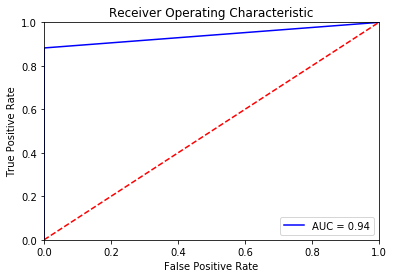

In [17]:
from utils import show_roc_curve

fig = show_roc_curve(y_true, y_pred)
fig.savefig('images/sig-bow-snk-main.svg')
fig.show()

In [5]:
import pickle
from utils import get_datasets, print_score_for, show_roc_curve
from negation_common import load_dataset

with open('model-forest-sig-bow.pkl', 'rb') as f:
    model = pickle.load(f)

sufix = '-sig-bow'
for dataset in get_datasets():
    print('============================================')
    print(dataset)
    df_train, df_test, df2_train, df2_test = load_dataset(dataset, 
                                                          sufix, 
                                                          ['token', 'lemma', 'POS', 'is_negation'])
    y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_negation)
    plot = show_roc_curve(y_true, y_pred)
    img_name = dataset.split('/')[1]
    plot.savefig('images/sig-bow-{}.svg'.format(img_name), transparent=True)
    plot.show()

dataset/beletria/merged.xml


ValueError: Number of features of the model must match the input. Model n_features is 9615 and input n_features is 9625 

In [12]:
#
# Save model
#

import pickle
with open('model-forest-sig-bow.pkl', 'wb') as fout:
    pickle.dump(model, fout)

In [10]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(df2_train, df_train.is_negation)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'n_estimators': [60, 100, 200], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.873408765455
{'n_estimators': 100, 'bootstrap': False, 'criterion': 'gini'}
